## 예제 이미지 다운로드

In [1]:
!wget -c "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg" -O dog.jpg
!wget -c "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg" -O kandinsky.jpg

--2020-06-18 04:57:55--  https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83281 (81K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  81.33K  --.-KB/s    in 0.001s  

2020-06-18 04:57:55 (121 MB/s) - ‘dog.jpg’ saved [83281/83281]

--2020-06-18 04:57:56--  https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195196 (191K) [image/jpeg]
Saving to: ‘kan

## 모형 다운로드

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
style_transfer = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

## 이미지 불러오기

In [5]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [8]:
content_image = load_img('dog.jpg')
style_image = load_img('kandinsky.jpg')

In [10]:
import matplotlib.pyplot as plt

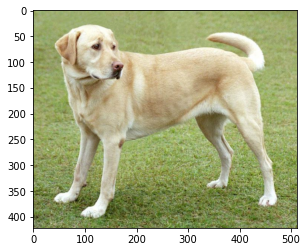

In [17]:
plt.imshow(tf.squeeze(content_image, axis=0))

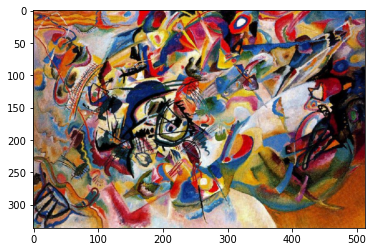

In [18]:
plt.imshow(tf.squeeze(style_image, axis=0))

## 스타일 트랜스퍼

In [20]:
stylized_image = style_transfer(content_image, style_image)[0]

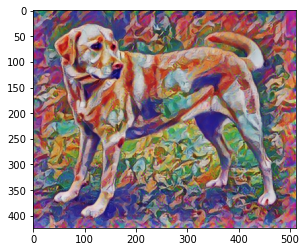

In [24]:
stylized_image = tf.squeeze(stylized_image, axis=0)
plt.imshow(stylized_image)

## 저장

In [37]:
tf.keras.preprocessing.image.save_img('style.jpg', stylized_image)